# 0.0 Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt


# 0.1 Functions

# 1 Data Description

## 1.1 Data Extraction and copy

In [3]:
# Data extraction
df = pd.read_csv('C:/Users/ThalesSilva/Documents/repos/large_files/amazon_eda/amz_br_total_products_data_processed.csv')

# Copy of dataset in order to preserve raw data
df1 = df.copy()




## 1.2 Cols Names Transformation

In [4]:
# Cols names transformation (if necessary) - No need to transform columns names as they are already in camel case


## 1.3 Dataset Dimensions

In [5]:
# Data dimensions (shape of df)
print(f'The number of columns in the dataset is:', df1.shape[0])
print(f'The number of columns in the dataset is:', df1.shape[1])


The number of columns in the dataset is: 1344513
The number of columns in the dataset is: 11


## 1.4 - Data Types Observation

In [6]:
df1.dtypes

asin                  object
title                 object
imgUrl                object
productURL            object
stars                float64
reviews                int64
price                float64
listPrice            float64
categoryName          object
isBestSeller            bool
boughtInLastMonth      int64
dtype: object

## 1.5 Check NA

In [7]:
df1.isna().sum()

asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
categoryName         0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

## 1.6 Fill NA

In [8]:
# No need to filL NA's as the dataset do not have any.


## 1.7 Data Types Transformation

In [9]:
# No need to change data types. The dataset already has tem set correctly.



## 1.8 Drop Columns

In [10]:
df1 = df1.drop(df1[['asin', 'imgUrl', 'productURL']], axis=1)

### 1.9 Duplicate Values

In [11]:
df1.duplicated().sum()

9874

## 1.9 Descriptive Stats

### 1.9.1 Numerical Variables

In [12]:
# Surpassing exponantial notation into 2 decimals format
pd.options.display.float_format = '{:.2f}'.format

num_var = df1.select_dtypes(include=['float64', 'int64'])
num_var.describe()

,stars,reviews,price,listPrice,boughtInLastMonth
count,1344513.00,1344513.00,1344513.00,1344513.00,1344513.00
mean,1.47,212.23,217.86,65.30,4.35
std,2.11,4581.19,856.21,2874.17,94.36
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,25.00,0.00,0.00
50%,0.00,0.00,69.00,0.00,0.00
75%,4.20,3.00,153.99,0.00,0.00
max,5.00,1878552.00,100000.00,1999000.00,40000.00


### 1.8.1 Categorical Variables

In [13]:
cat_var = df1.select_dtypes(exclude=['float64', 'int64'])

# Finding unique categories for each categorical variable
cat_var.apply(lambda x: x.unique().shape[0])

title           1308169
categoryName        206
isBestSeller          2
dtype: int64

# 2 Hypothesis Map 

In [14]:
# Client view
    # Categories bouth in last month sell more

# Price view
    # How the price of products is divided by range of price?
    # Products with listprice sell more

# 3 Feature Engineering

In [19]:
df1['discount'] = df1['listPrice'].apply(lambda x: 'Sim' if x > 0 else 'Não')

# 4 EDA

In [20]:
# Copy of dataset 
df2 = df1.copy()

## 3.1 Categories with higher stars sell more

### False: Products with lower stars sell more

NameError: name 'aux2' is not defined

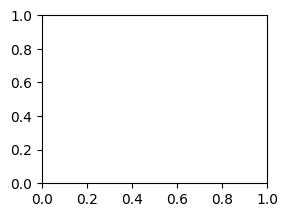

In [21]:
# Group by
plt.subplot(2,2,1) # Duas colunas, duas linhas, posiçao um da esquerda pra direita
aux1 = df2[['price', 'stars']].groupby('price').sum().reset_index()

# Bins
bins = list(np.arange(0,6,1))
aux2['stars_binned'] = pd.cut(aux1['stars'], bins=bins)

# Plot
sns.barplot(x='stars_binned', y='price', data=aux2)

# Heatmap
plt.subplot(2,2,2)
sns.heatmap( aux1.corr( method='pearson' ), annot=True )


## 3.2 Categories with more reviews sell more

### False: No correlation founded.

                                   categoryName  reviews   price
0                                         Bebês    32017   98.77
1                                   Eletrônicos    31453  333.08
2                                      Mochilas    19121  198.67
3               Produtos de Cuidados com a Pele    19010  115.32
4         Instrumentos para Modelagem de Cabelo    19010   95.60
..                                          ...      ...     ...
201                           Indicações Amazon       61   41.24
202                  TV, Áudio e Cinema em Casa       48 1726.74
203  Produtos de Proteção do Sol e Bronzeadores       39   73.74
204                                 Lançamentos       31   64.43
205                     Pré-venda e Lançamentos       13   61.84

[206 rows x 3 columns]


<Axes: >

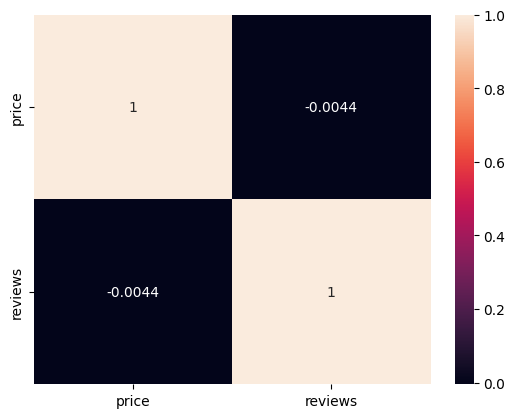

In [ ]:
aux3 = df2.groupby('categoryName').agg({
    'reviews': 'count',    # Contagem das avaliações
    'price': 'mean'     # Média dos preços
}).sort_values(by='reviews', ascending=False).reset_index() 
# Para usar a mesma base de agregaçao para duas agregaçoes em colunas diferentes tem que ser pelo .agg()
print(aux3)


aux4 = aux3[['price', 'reviews']]
sns.heatmap( aux4.corr( method='pearson' ), annot=True )

## 3.3 Categories best seller sell more

### True

<Axes: >

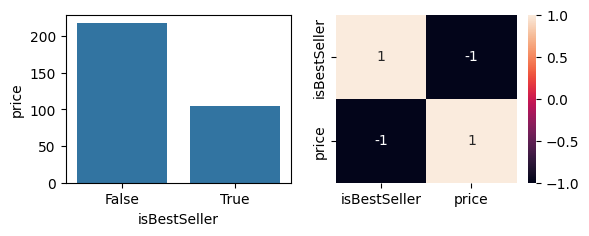

In [22]:
plt.subplot(2,2,1)
aux5 = df2[['price', 'isBestSeller']].groupby('isBestSeller').mean().reset_index()
sns.barplot(x='isBestSeller', y='price', data=aux5)

plt.subplot(2,2,2)
sns.heatmap( aux5.corr( method='pearson' ), annot=True )

## 3.4 Categories bouth in last month sell more


<Axes: xlabel='boughtInLastMonth', ylabel='price'>

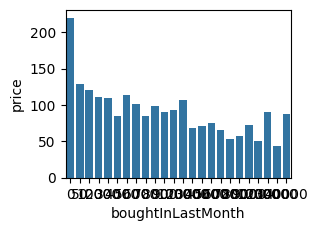

In [23]:
plt.subplot(2,2,1)
aux6 = df2[['price', 'boughtInLastMonth']].groupby('boughtInLastMonth').mean().reset_index()
sns.barplot(x='boughtInLastMonth', y='price', data=aux6)

#plt.subplot(2,2,2)
#sns.heatmap( aux5.corr( method='pearson' ), annot=True )

In [24]:
df['boughtInLastMonth'].unique()

df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth,discount
0,B0C154VR2L,"SAMSUNG Smart TV Crystal 50"" 4K UHD CU7700 - A...",https://m.media-amazon.com/images/I/71vk2qFDSP...,https://www.amazon.com.br/dp/B0C154VR2L,4.60,269,2279.05,0.00,"TV, Áudio e Cinema em Casa",False,0,Não
1,B0C85J5HYD,Mini Projetor Portatil 5G Wifi 6 Bluetooth 5.0...,https://m.media-amazon.com/images/I/5133wKaOqS...,https://www.amazon.com.br/dp/B0C85J5HYD,4.50,816,409.99,0.00,"TV, Áudio e Cinema em Casa",True,5000,Não
2,B0C1538ZJ4,"Samsung Smart TV Crystal 43"" 4K UHD CU7700 - A...",https://m.media-amazon.com/images/I/71vk2qFDSP...,https://www.amazon.com.br/dp/B0C1538ZJ4,4.70,638,1969.00,2499.00,"TV, Áudio e Cinema em Casa",False,0,Sim
3,B0B4V379PC,"Samsung 60BU8000 - Smart TV LED 60' 4K UHD, Wi...",https://m.media-amazon.com/images/I/8110fzpU-P...,https://www.amazon.com.br/dp/B0B4V379PC,4.60,675,3099.00,0.00,"TV, Áudio e Cinema em Casa",False,0,Não
4,B0899BRB4B,Smart TV LED 32'' HD Samsung LH32BETBLGGXZD,https://m.media-amazon.com/images/I/61M025WzQd...,https://www.amazon.com.br/dp/B0899BRB4B,4.70,3945,1079.90,1369.00,"TV, Áudio e Cinema em Casa",True,0,Sim


## 3.5 How the price of products is divided by category?

In [25]:
aux7 = df[['categoryName', 'price']].groupby('categoryName').mean().reset_index().sort_values('price', ascending=False)
aux7.head(10)

,categoryName,price
45,Computadores Desktop,1759.49
183,"TV, Áudio e Cinema em Casa",1726.74
133,Notebooks,1692.02
128,Móveis e Acessórios para Jardim e Quintal,1282.16
127,Monitores de Computador,1193.75
100,Jogos de Louças e Aparelhos de Jantar,1153.05
161,Produtos de Passeio e Viagem para Bebês,866.52
60,Eletrodomésticos,866.21
201,fashion-womens-jewelry,821.74
46,Computadores e Informática,735.54


## 3.6 How the price of products is divided by range of price?


C:\Users\ThalesSilva\AppData\Local\Temp\ipykernel_33336\2885749994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price'])


<Axes: xlabel='price', ylabel='Density'>

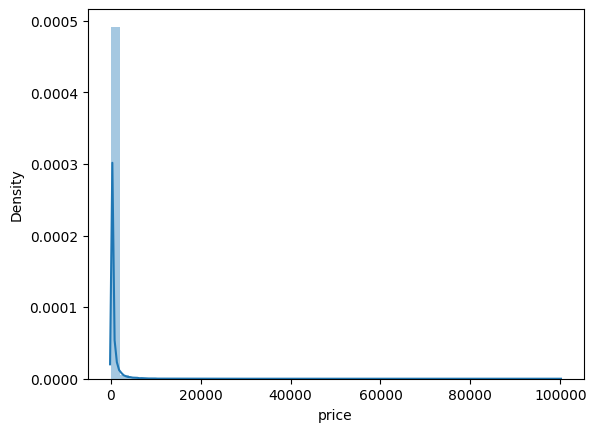

In [26]:
sns.distplot(df2['price'])

 ## 3.7 Products with listprice (discount) sell more

<Axes: >

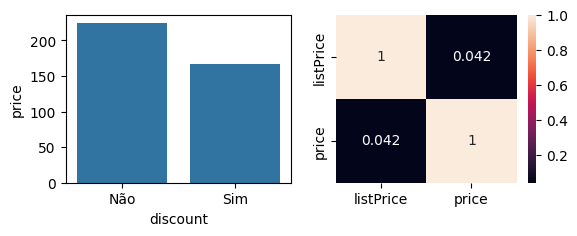

In [31]:
plt.subplot(2,2,1)
aux8 = df[['discount', 'price']].groupby('discount').mean().reset_index() 
sns.barplot(x='discount', y='price', data=aux8)


aux9 = df[['listPrice', 'price']].groupby('listPrice').mean().reset_index()
plt.subplot(2,2,2)
sns.heatmap( aux9.corr( method='pearson' ), annot=True )

In [ ]:
#Analyze pricing trends across different product categories.
#Explore the correlation between customer ratings and the number of reviews.
#Identify the best-selling products on Amazon.com.br.
#Study the relationship between pricing and customer reviews.
#Create a recommendation system based on customer ratings and product categories.
#Analyze the availability of products in different price ranges.